Relatório de Modelagem e Simulação - Grupo Enzo

Membros:
Ísis Ardisson Logullo
João Pedro Lukasavicus Silva
Leonardo Martinez Ikeda
Matheus Conceição
Vitor Barbosa Sério

Introdução
Experimento de medidas de Movimento Retilíneo Uniforme(MRU) e de Movimento Retilíneo Uniformemente Variado(MRUV). Usando um espaço de 30m, marcamos o chão com distâncias de 0,5m. Essa distância representa o tamanho da passada de todas as pessoas que realizaram o experimento. Nos pontos 10m, 20m e 30m haviam 2 cronômetros distintos marcando o tempo em que a pessoa passava por aquela distância. Assim na versão MRU cada participante andou num ritmo constante próprio sobre as marcações. Na versão MRUV foi incrementado o uso de metrônomo, para ir acelerando o ritmo, cada passada era 1 bpm a mais. Junto disso todos faziam a travessia com um acelerômetro acionado. Apenas uma medida de cada pessoa teve uma variante de pontos de marcação, sendo apenas 1 cronômetro nas posições 5m, 10m, 15m, 20m, 25m e 30m, em ambos experimentos. Através do tempo e distâncias obtidas serão modeladas velocidade e aceleração de cada indivíduo. Calculando suas velocidades médias, comparando com os dados obtidos pelo acelerômetro e analisando possíveis erros.
Abaixo o vídeo do experimento realizado.
Link Youtube: http://www.youtube.com/watch?v=NG1ZBwy8VBw


Método
Utilizamos uma tabela, com extensão csv, montada com as medidas dos cronômetros do experimento. 
Abaixo temos o código da plotagem dos gráficos. Primeiro foram calculadas as médias de tempo dos experimentos repetidos em cada pessoa. Depois usando esses tempos calculamos as velocidades e acelerações pelo método padrão, utilizando tempo e distância. Existe uma função para cada pessoa. Organizamos a busca pelos itens do experimento. Se era a marcação deslocada (5, 10, 15, 20, 25, 30) ou não deslocado(10, 20, 30). Qual pessoa que era e em qual travessia estava, já que foram repetidos os não deslocados 2 vezes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [31]:
###############################################################################
# Funções para ajustar os dados

def arruma_tempos(raw_data):
    # Calculando as médias dos pontos que possuem duas medidas de tempo
    data = raw_data[raw_data['Deslocado'] == False].copy()
    
    for row in data.index.values:
        try:
            t1 = data.at[row, 'Tempo']
            t2 = data.at[row + 1, 'Tempo']
            data.at[row, 'Tempo'] = ((t1 + t2)/2)
            data = data.drop(row + 1)
            pass
        except:
            continue
    
    data = pd.concat([data, raw_data[raw_data['Deslocado'] == True]])
    
    data = data.reset_index(drop = True)
            
    return data

def calc_vel_ac_1(data):
    # Calculando, ponto a ponto, as variações de espaço (ds), tempo (dt)
    # e velocidade (dv) e as velocidade e aceleração médias (vm e am)
    data['v'] = 0.0
    data['vm'] = 0.0
    data['a'] = 0.0
    data['am'] = 0.0
    data['agm'] = 0.0

    movimentos = data['Tipo'].unique()
    deslocado = data['Deslocado'].unique()
    pessoa = data['Pessoa'].unique()
    travessia = data['Travessia'].unique()

    for m in movimentos:
        for p in pessoa:
            for d in deslocado:
                for t in travessia:

                    if d and t == 'T2':
                        continue

                    M = data['Tipo'] == m
                    D = data['Deslocado'] == d
                    P = data['Pessoa'] == p
                    T = data['Travessia'] == t

                    index = data[M & D & P & T].index.values

                    for i in index:
                        data.at[i, 'v'] = data.at[i, 'Distancia'] / data.at[i, 'Tempo']
                        data.at[i, 'a'] = 2 * data.at[i, 'Distancia'] / (data.at[i, 'Tempo'] ** 2)
                    
            index = data[M & P].index.values
            
            vm = data.loc[index, 'v'].mean()
            data.loc[index, 'vm'] = vm
            am = data.loc[index, 'a'].mean()
            data.loc[index, 'am'] = am
            
        index = data[M].index.values
        
        agm = data.loc[index, 'a'].mean()
        data.loc[index, 'agm'] = agm
    
    
    return data

def calc_vel_ac_3(data):
     # Calculando, ponto a ponto, as variações de espaço (ds), tempo (dt)
    # e velocidade (dv) e as velocidade e aceleração médias (vm e am)
    data['v'] = 0.0
    data['vm'] = 0.0
    data['a'] = 0.0
    data['am'] = 0.0
    data['agm'] = 0.0

    movimentos = data['Tipo'].unique()
    deslocado = data['Deslocado'].unique()
    pessoa = data['Pessoa'].unique()
    travessia = data['Travessia'].unique()

    for m in movimentos:
        for p in pessoa:
            for d in deslocado:
                for t in travessia:

                    if d and t == 'T2':
                        continue

                    M = data['Tipo'] == m
                    D = data['Deslocado'] == d
                    P = data['Pessoa'] == p
                    T = data['Travessia'] == t

                    index = data[M & D & P & T].index.values

                    for i in index:
                        data.at[i, 'v'] = data.at[i, 'Distancia'] / data.at[i, 'Tempo']
                        data.at[i, 'a'] = 2 * data.at[i, 'Distancia'] / (data.at[i, 'Tempo'] ** 2)
                    
            index = data[M & P].index.values
            
            vm = (data.loc[index, 'v'] * data.loc[index, 'Tempo']).sum() / data.loc[index, 'Tempo'].sum()
            data.loc[index, 'vm'] = vm
            am = (data.loc[index, 'a'] * data.loc[index, 'Tempo']).sum() / data.loc[index, 'Tempo'].sum()
            data.loc[index, 'am'] = am
            
        index = data[M].index.values
        
        agm = (data.loc[index, 'a'] * data.loc[index, 'Tempo']).sum() / data.loc[index, 'Tempo'].sum()
        data.loc[index, 'agm'] = agm
    
    
    return data
    
###############################################################################
# Funções para plotar os gráficos
def plot_mru_pos(x, y, v, show = True):
    
    xmax = x.max()
    
    ymax = v * xmax
    
    plt.scatter(x, y)
    plt.plot([0, xmax], [0, ymax], '--')
    if show: plt.show()

def plot_mruv_pos(x, y, a, show = True):
    
    xmax = x.max()
    
    tx = np.linspace(0, xmax, 1000)
    ty = (a * (tx ** 2)) / 2
    
    plt.scatter(x, y)
    plt.plot(tx, ty, '--')
    if show: plt.show()    

def plot_pos(data, x, y, tipo = 0, p = 1, show = True):
    
    mov = ['MRU', 'MRUV'][tipo]
    pes = ['Geral', 'P1', 'P2', 'P3'][p]
    
    P = data['Pessoa'] == pes if p > 0 else True
    M = data['Tipo'] == mov
      
    df = data[M & P].loc[:, ['Distancia', 'Tempo', 'v', 'a', 'vm', 'am', 'agm']].copy()
    df = df.reset_index(drop = True)
    
    coef = df.at[0, 'vm'] if not tipo else df.at[0, 'am'] if p > 0 else df.at[0, 'agm']
    
    plt.title(('Espaço x Tempo', mov, pes))
    plt.xlabel('Tempo')
    plt.ylabel('Posição')
    if tipo: plot_mruv_pos(df[x], df[y], coef, show)
    else: plot_mru_pos(df[x], df[y], coef, show)

def plot_vel(data, x, y, pes = 1, show = True):
    
    pes = ['Geral', 'P1', 'P2', 'P3'][pes]
    
    P = data['Pessoa'] == pes if p > 0 else True
    M = data['Tipo'] == 'MRUV'
    
    df = data[M & P].copy()
    df = df.reset_index(drop = True)
    
    df['Tempo'] = df['Tempo'] / 2
    
    coef = df.at[0, 'am'] if p > 0 else df.at[0, 'agm']
    
    tmax = df['Tempo'].max()
    vmax = coef * tmax
    
    plt.title(('Velocidade x Tempo', 'MRUV', pes))
    plt.xlabel('Tempo')
    plt.ylabel('Velocidade')
    plt.scatter(df[x], df[y])
    plt.plot([0, tmax], [0, vmax], '--')
    if show: plt.show()
    
def plot_erros(data, x, y, tipo = 0, p = 1, vel = False, show = True):
    
    mov = ['MRU', 'MRUV'][tipo]
    pes = ['Geral', 'P1', 'P2', 'P3'][p]
    
    P = data['Pessoa'] == pes if p > 0 else True
    M = data['Tipo'] == mov
    
    df = data[M & P].copy()
    df = df.reset_index(drop = True)
    
    coef = df.at[0, 'vm'] if not tipo else df.at[0, 'am'] if p > 0 else df.at[0, 'agm']
    
    if vel:
        df[x] = df[x] / 2
        df['teor'] = coef * df[x] 
    else:
        df['teor'] = coef * (df[x] ** 2) / 2 if tipo else coef * df[x] 
    
    df['e'] = df[y] - df['teor']
    
    xmax = df[x].max()
    
    plt.xlabel('Tempo')
    plt.ylabel('Erro')
    plt.scatter(df[x], df['e'])
    plt.plot([0, xmax], [0, 0], '--')
    if show: plt.show()

Dados
A seguir os gráficos dos dados são gerados. 

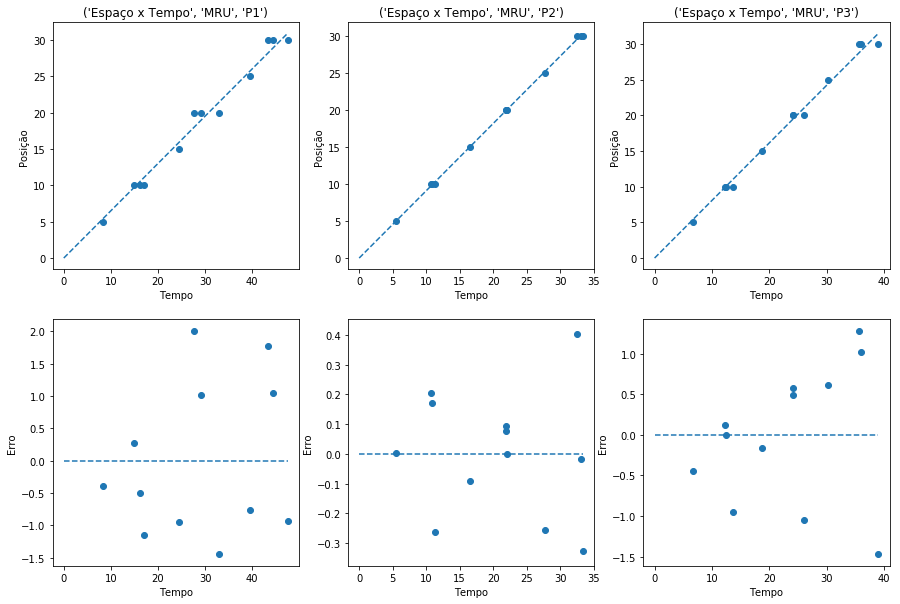

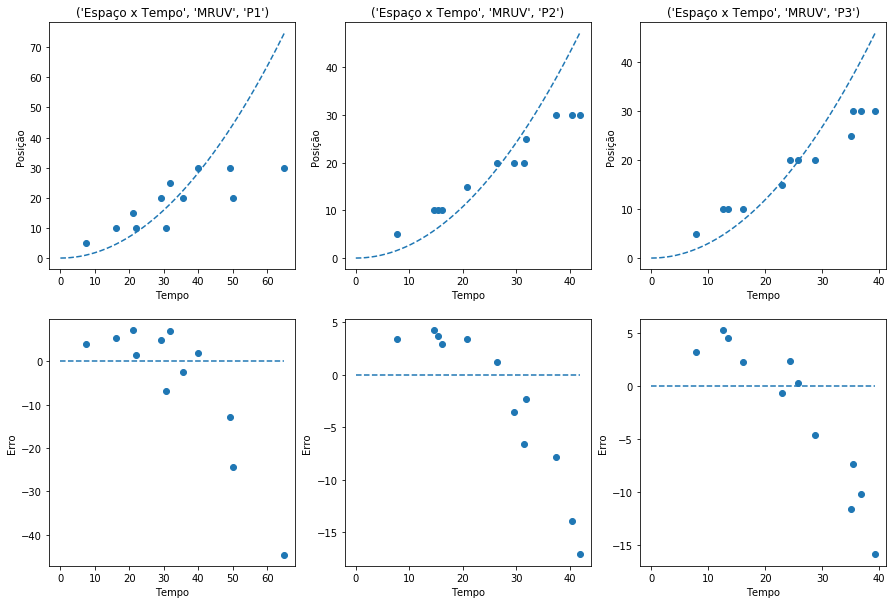

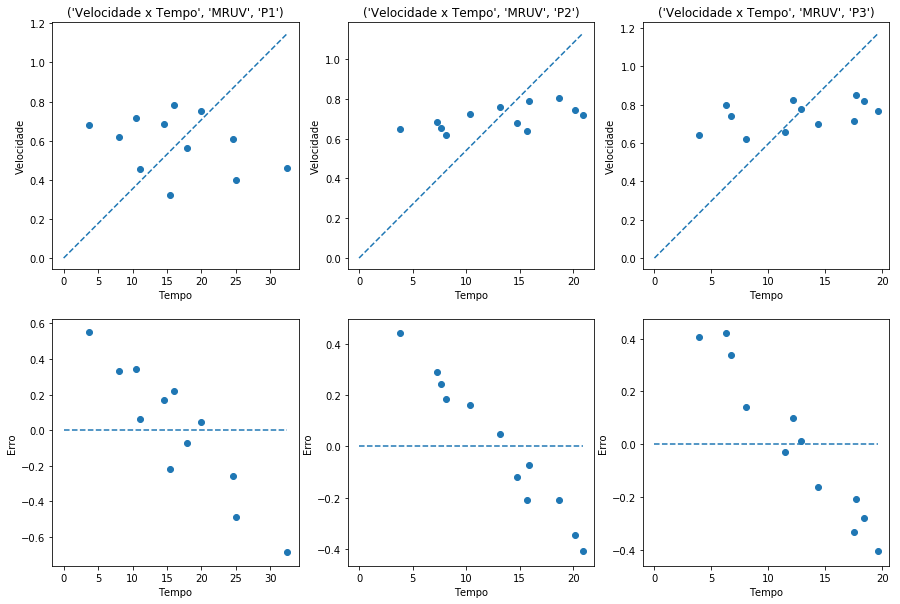

In [32]:
raw_data = pd.read_csv("tempos.csv")

# Arrumando os dados
data = arruma_tempos(raw_data)
data = calc_vel_ac_3(data)

# Plotando todos os gráficos de espaço por tempo

plt.figure(figsize = (15, 10), facecolor = '#FFFFFF')

i = 1
m = 0
for t in [0, 1]:
    for p in [1, 2, 3]:
        
        plt.subplot(2, 3, i)
        if t: plot_erros(data, 'Tempo', 'Distancia', m, p, show = False)
        else: plot_pos(data, 'Tempo', 'Distancia', m, p, show = False)
        i += 1

plt.show()


plt.figure(figsize = (15, 10), facecolor = '#FFFFFF')

i = 1
m = 1
for t in [0, 1]:
    for p in [1, 2, 3]:
        
        plt.subplot(2, 3, i)
        if t: plot_erros(data, 'Tempo', 'Distancia', m, p, show = False)
        else: plot_pos(data, 'Tempo', 'Distancia', m, p, show = False)
        i += 1

plt.show()

plt.figure(figsize = (15, 10), facecolor = '#FFFFFF')

i = 1
for t in [0, 1]:
    for p in [1, 2, 3]:
        
        plt.subplot(2, 3, i)
        if t: plot_erros(data, 'Tempo', 'v', 1, p, True, False)
        else: plot_vel(data, 'Tempo', 'v', p, False)
        i += 1

plt.show()

Análise dos dados
Os dados foram analisados separadamente. Para cada pessoa do experimento foram analisados o MRU e depois o MRUV. Abaixo aparecem a velocidade média no MRU e os gráficos de travessia gerado pelos dados coletados. Podemos ver pelos gráficos que a pessoa 1 teve uma média uniforme, no MRU. As duas primeiras travessias foram uniformes, porém a travessia deslocada já começa a apresentar erros mais discrepantes alterando o gráfico.

In [10]:
velocidades_medias = []
aceleracoes_medias = []
snd = [0, 10, 20, 30]                 #espaço não deslocado
sd = [0, 5, 10, 15, 20, 25, 30]           #espaço deslocado  
                    
#separando em dois tipos de movimento
data_MRU = data[data['Tipo']=='MRU'].copy()
data_MRUV  = data[data['Tipo']=='MRUV'].copy()
#print(data_MRUV)

#separando em espaços não deslocados e deslocados
data_MRU_nd = data_MRU[data_MRU['Deslocado']==False].copy()
data_MRU_d = data_MRU[data_MRU['Deslocado']== True].copy()

data_MRUV_nd = data_MRUV[data_MRUV['Deslocado']==False].copy()
data_MRUV_d = data_MRUV[data_MRUV['Deslocado']==True].copy()

In [246]:
#Funções

def MRU(v, s, label):
    t = 0 
    Ts = []    
    for i in range(len(s)):
        t = s[i]/v        
        Ts.append(t)  

    plt.title('Média ' + label)    
    plt.plot(Ts, s)    
    plt.axis([0, np.amax(Ts), 0, 30])
    plt.show()

def MRUV(a, s, label):
    t = 0
    Ts = []
    for i in range(len(s)):
        t = math.sqrt((2*s[i])/a)
        Ts.append(t)
    
    plt.title('Media ' + label)
    plt.plot(Ts, s)
    plt.axis([0, np.amax(Ts), 0, 30])
    plt.show()
    
def plot(s, t, label):
    plt.plot(t, s)
    plt.axis([0, np.amax(t), 0, 30])
    plt.title(label)
    plt.show()
#print(data)


0.5161111111111111 m/s


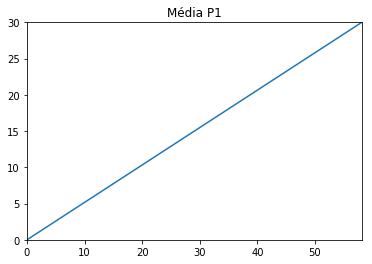

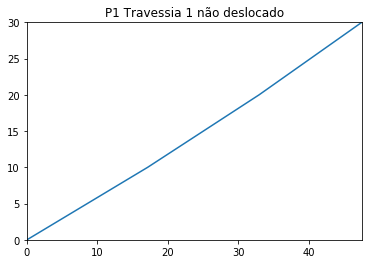

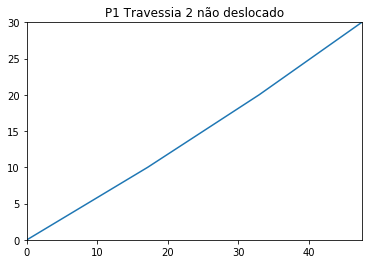

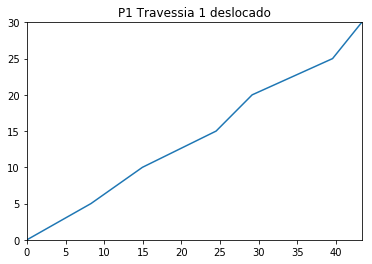

In [247]:
#Analise dos dados para primeira MRU não deslocado e deslocado
data_P1_nd = data_MRU_nd[data_MRU_nd['Pessoa']=='P1'].copy()
data_P1_d = data_MRU_d[data_MRU_d['Pessoa']=='P1'].copy()
#Calculo do tempo médio
tm_P1_MRU = data_P1_nd['Tempo'].mean()

# calculo da velocidade média da pessoa 1
vm_P1_MRU = tm_P1_MRU/60
print(str(vm_P1_MRU) + ' m/s')
velocidades_medias.append(vm_P1_MRU)  #adicionando velocidade média para calculo
MRU(vm_P1_MRU, snd, 'P1')

# Plotar travessias 1 e 2 MRU não deslocado
data_T1 = data_P1_nd[data_P1_nd['Travessia']=='T1'].copy()
data_T2 = data_P1_nd[data_P1_nd['Travessia']=='T2'].copy()
tempos_T1 = data_T1.loc[:, 'Tempo'].values
tempos_T2 = data_T1.loc[:, 'Tempo'].values
tempos_T1 = np.concatenate(([0],tempos_T1), axis=0)
tempos_T2 = np.concatenate(([0],tempos_T2), axis=0)

plot(snd, tempos_T1, 'P1 Travessia 1 não deslocado')
plot(snd, tempos_T2, 'P1 Travessia 2 não deslocado')

# Plotar travessia 1 MRU deslocado
data_T1 = data_P1_d[data_P1_d['Travessia']=='T1'].copy()
tempos_T1 = data_T1.loc[:, 'Tempo'].values
tempos_T1 = np.concatenate(([0], tempos_T1), axis=0)

plot(sd, tempos_T1, 'P1 Travessia 1 deslocado')


No MRUV a pessoa 1 já teve erros mais aparentes na curvatura de aceleração. A média tem o formato mais longe do que era esperado, com erros bem visíveis. As 2 travessias normais apresentam bastante erro. O movimento deslocado como no MRU apresenta erros mais alternados de variação. Esse teve bastante erro no geral.

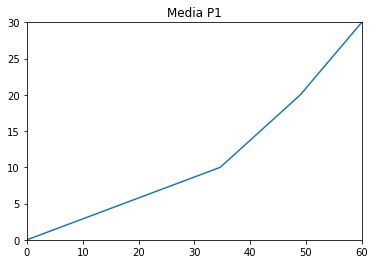

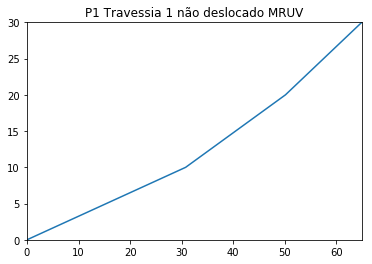

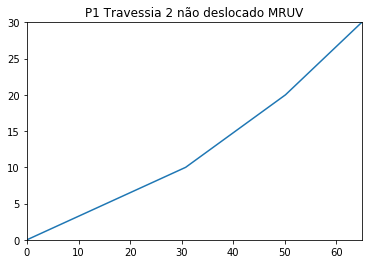

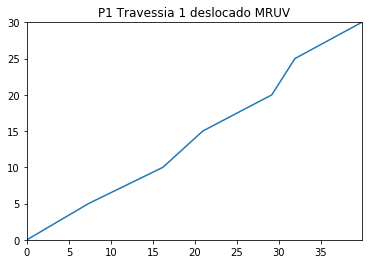

In [248]:
#Analise dos dados para primeira MRUV não deslocado e deslocado
data_P1_nd = data_MRUV_nd[data_MRUV_nd['Pessoa']=='P1'].copy()
data_P1_d = data_MRUV_d[data_MRUV_d['Pessoa']=='P1'].copy()

# calculo da aceleração média
tm_P1_MRUV = data_P1_nd['Tempo'].mean()
vm_P1_MRUV = tm_P1_MRUV/60
am_P1_MRUV = vm_P1_MRUV/tm_P1_MRUV
aceleracoes_medias.append(am_P1_MRUV)
MRUV(am_P1_MRUV, snd, 'P1')

#Plotar travessias 1 e 2 MRUV não deslocado
data_T1 = data_P1_nd[data_P1_nd['Travessia']=='T1'].copy()
data_T2 = data_P1_nd[data_P1_nd['Travessia']=='T2'].copy()
tempos_T1 = data_T1.loc[:, 'Tempo'].values
tempos_T2 = data_T1.loc[:, 'Tempo'].values
tempos_T1 = np.concatenate(([0],tempos_T1), axis=0)
tempos_T2 = np.concatenate(([0],tempos_T2), axis=0)

plot(snd, tempos_T1, 'P1 Travessia 1 não deslocado MRUV')
plot(snd, tempos_T2, 'P1 Travessia 2 não deslocado MRUV')

# Plotar travessia 1 MRU deslocado
data_T1 = data_P1_d[data_P1_d['Travessia']=='T1'].copy()
tempos_T1 = data_T1.loc[:, 'Tempo'].values
tempos_T1 = np.concatenate(([0], tempos_T1), axis=0)

plot(sd, tempos_T1, 'P1 Travessia 1 deslocado MRUV')




A segunda pessoa em MRU apresenta média, travessias normais e deslocadas como era esperado. Bem uniforme e quase isento de erros. (Será um robô!?)

0.3667083333333333 m/s


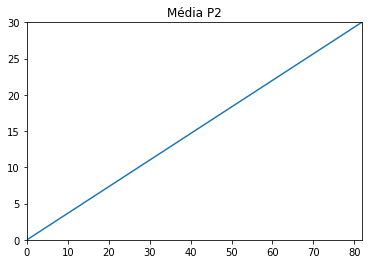

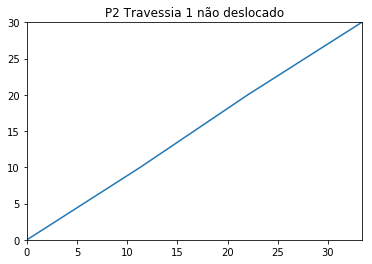

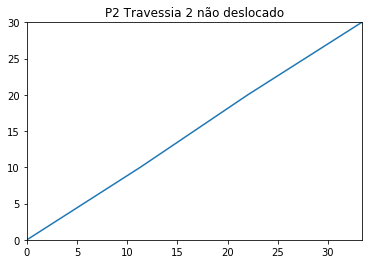

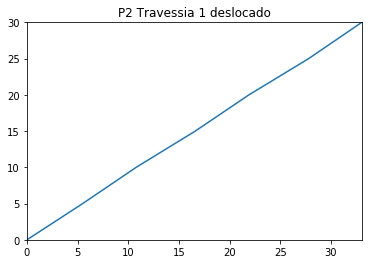

In [249]:
#Analise dos dados para primeira MRU não deslocado e deslocado
data_P2_nd = data_MRU_nd[data_MRU_nd['Pessoa']=='P2'].copy()
data_P2_d = data_MRU_d[data_MRU_d['Pessoa']=='P2'].copy()
#Calculo do tempo médio
tm_P2_MRU = data_P2_nd['Tempo'].mean()

# calculo da velocidade média da pessoa 2
vm_P2_MRU = tm_P2_MRU/60
print(str(vm_P2_MRU) + ' m/s')
velocidades_medias.append(vm_P2_MRU)  #adicionando velocidade média para calculo
MRU(vm_P2_MRU, snd, 'P2')

# Plotar travessias 1 e 2 MRU não deslocado
data_T1 = data_P2_nd[data_P2_nd['Travessia']=='T1'].copy()
data_T2 = data_P2_nd[data_P2_nd['Travessia']=='T2'].copy()
tempos_T1 = data_T1.loc[:, 'Tempo'].values
tempos_T2 = data_T1.loc[:, 'Tempo'].values
tempos_T1 = np.concatenate(([0],tempos_T1), axis=0)
tempos_T2 = np.concatenate(([0],tempos_T2), axis=0)

plot(snd, tempos_T1, 'P2 Travessia 1 não deslocado')
plot(snd, tempos_T2, 'P2 Travessia 2 não deslocado')

# Plotar travessia 1 MRU deslocado
data_T1 = data_P2_d[data_P2_d['Travessia']=='T1'].copy()
tempos_T1 = data_T1.loc[:, 'Tempo'].values
tempos_T1 = np.concatenate(([0], tempos_T1), axis=0)

plot(sd, tempos_T1, 'P2 Travessia 1 deslocado')

No MRUV a pessoa 2 teve uma média de aceleração com erros. Porém nas travessias normais e deslocadas manteve bem próximo da uniformidade. Com baixos erros, a pessoa 2 teve um experimento bem próximo do esperado, tanto em MRU quanto em MRUV.

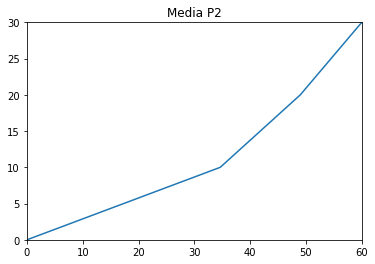

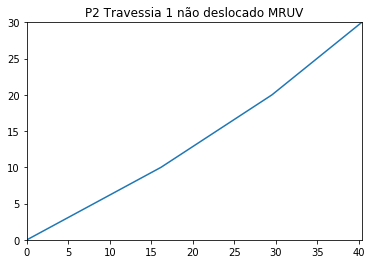

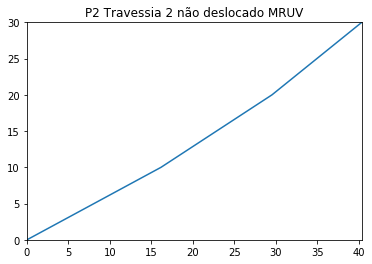

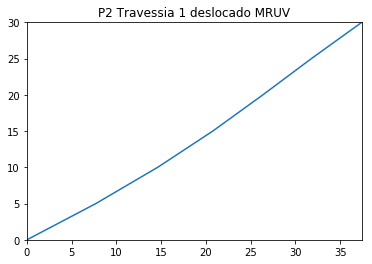

In [250]:
#Analise dos dados para primeira MRUV não deslocado e deslocado
data_P2_nd = data_MRUV_nd[data_MRUV_nd['Pessoa']=='P2'].copy()
data_P2_d = data_MRUV_d[data_MRUV_d['Pessoa']=='P2'].copy()

# calculo da aceleração média
tm_P2_MRUV = data_P2_nd['Tempo'].mean()
vm_P2_MRUV = tm_P2_MRUV/60
am_P2_MRUV = vm_P2_MRUV/tm_P2_MRUV
aceleracoes_medias.append(am_P2_MRUV)
MRUV(am_P2_MRUV, snd, 'P2')

#Plotar travessias 1 e 2 MRUV não deslocado
data_T1 = data_P2_nd[data_P2_nd['Travessia']=='T1'].copy()
data_T2 = data_P2_nd[data_P2_nd['Travessia']=='T2'].copy()
tempos_T1 = data_T1.loc[:, 'Tempo'].values
tempos_T2 = data_T1.loc[:, 'Tempo'].values
tempos_T1 = np.concatenate(([0],tempos_T1), axis=0)
tempos_T2 = np.concatenate(([0],tempos_T2), axis=0)

plot(snd, tempos_T1, 'P2 Travessia 1 não deslocado MRUV')
plot(snd, tempos_T2, 'P2 Travessia 2 não deslocado MRUV')

# Plotar travessia 1 MRU deslocado
data_T1 = data_P2_d[data_P2_d['Travessia']=='T1'].copy()
tempos_T1 = data_T1.loc[:, 'Tempo'].values
tempos_T1 = np.concatenate(([0], tempos_T1), axis=0)

plot(sd, tempos_T1, 'P2 Travessia 1 deslocado MRUV')


A pessoa 3 foi bem próxima da 2 no MRU. Teve uma velocidade média super dentro do esperado. As duas travessias normais foram bem próximas também. Com pouquissimos erros. Já a alternada os erros começam ficar mais visiveis e fugindo um pouco do esperado, mas ainda é sutil.

0.41918055555555556 m/s


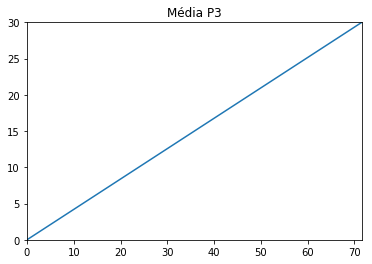

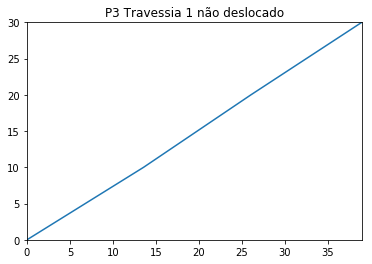

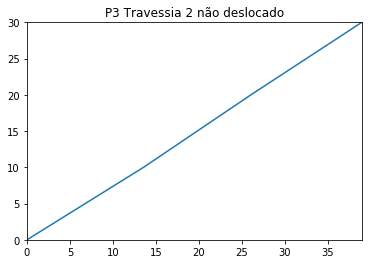

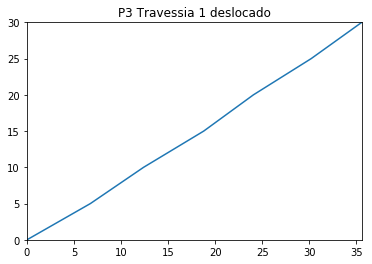

In [251]:
#Analise dos dados para primeira MRU não deslocado e deslocado
data_P3_nd = data_MRU_nd[data_MRU_nd['Pessoa']=='P3'].copy()
data_P3_d = data_MRU_d[data_MRU_d['Pessoa']=='P3'].copy()
#Calculo do tempo médio
tm_P3_MRU = data_P3_nd['Tempo'].mean()

# calculo da velocidade média da pessoa 3
vm_P3_MRU = tm_P3_MRU/60
print(str(vm_P3_MRU) + ' m/s')
velocidades_medias.append(vm_P3_MRU)  #adicionando velocidade média para calculo
MRU(vm_P3_MRU, snd, 'P3')

# Plotar travessias 1 e 2 MRU não deslocado
data_T1 = data_P3_nd[data_P3_nd['Travessia']=='T1'].copy()
data_T2 = data_P3_nd[data_P3_nd['Travessia']=='T2'].copy()
tempos_T1 = data_T1.loc[:, 'Tempo'].values
tempos_T2 = data_T1.loc[:, 'Tempo'].values
tempos_T1 = np.concatenate(([0],tempos_T1), axis=0)
tempos_T2 = np.concatenate(([0],tempos_T2), axis=0)

plot(snd, tempos_T1, 'P3 Travessia 1 não deslocado')
plot(snd, tempos_T2, 'P3 Travessia 2 não deslocado')

# Plotar travessia 1 MRU deslocado
data_T1 = data_P3_d[data_P3_d['Travessia']=='T1'].copy()
tempos_T1 = data_T1.loc[:, 'Tempo'].values
tempos_T1 = np.concatenate(([0], tempos_T1), axis=0)

plot(sd, tempos_T1, 'P3 Travessia 1 deslocado')

No MRUV a aceleração média teve uma divergência do esperado, mas isso ocorreu com todas as pessoas do experimento no MRUV. Nas travessias normais manteve igual ao MRU, bem uniforme. Na alternada os erros também já se tornaram mais visíveis, não sendo tão sutil. 

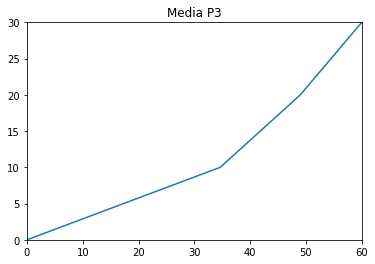

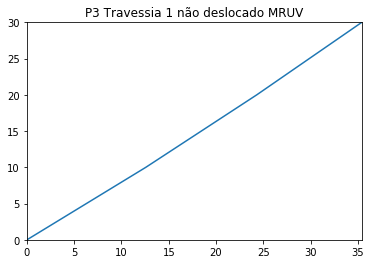

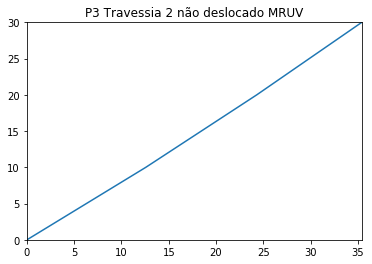

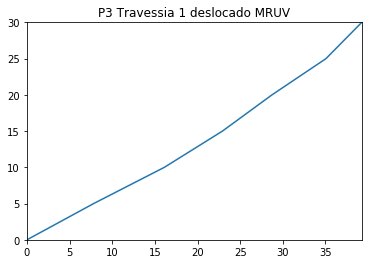

In [252]:
#Analise dos dados para primeira MRUV não deslocado e deslocado
data_P3_nd = data_MRUV_nd[data_MRUV_nd['Pessoa']=='P3'].copy()
data_P3_d = data_MRUV_d[data_MRUV_d['Pessoa']=='P3'].copy()

# calculo da aceleração média
tm_P3_MRUV = data_P3_nd['Tempo'].mean()
vm_P3_MRUV = tm_P3_MRUV/60
am_P3_MRUV = vm_P3_MRUV/tm_P3_MRUV
aceleracoes_medias.append(am_P3_MRUV)
MRUV(am_P3_MRUV, snd, 'P3')

#Plotar travessias 1 e 2 MRUV não deslocado
data_T1 = data_P3_nd[data_P3_nd['Travessia']=='T1'].copy()
data_T2 = data_P3_nd[data_P3_nd['Travessia']=='T2'].copy()
tempos_T1 = data_T1.loc[:, 'Tempo'].values
tempos_T2 = data_T1.loc[:, 'Tempo'].values
tempos_T1 = np.concatenate(([0],tempos_T1), axis=0)
tempos_T2 = np.concatenate(([0],tempos_T2), axis=0)

plot(snd, tempos_T1, 'P3 Travessia 1 não deslocado MRUV')
plot(snd, tempos_T2, 'P3 Travessia 2 não deslocado MRUV')

# Plotar travessia 1 MRU deslocado
data_T1 = data_P3_d[data_P3_d['Travessia']=='T1'].copy()
tempos_T1 = data_T1.loc[:, 'Tempo'].values
tempos_T1 = np.concatenate(([0], tempos_T1), axis=0)

plot(sd, tempos_T1, 'P3 Travessia 1 deslocado MRUV')

Comparando as 3 pessoas do experimento suas velocidades médias são uniformes no MRU. Porém no MRUV as acelerações estão com alguns erros, o gráfico não é tão uniforme. O que mostra a dificuldade em de medir MRUV.

Média das velocidades de todas as pessoas MRU
0.43749218749999996 m/s


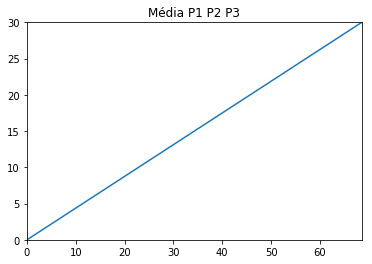

Médias das acelerações de todas as pessoas MRUV
0.016666666666666666 m*m/s


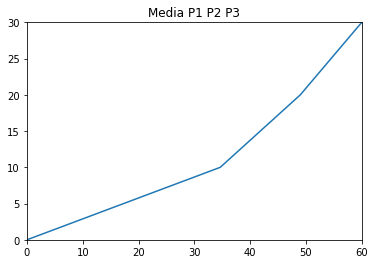

In [253]:
print('Média das velocidades de todas as pessoas MRU')
vms = np.mean(velocidades_medias)
print(str(vms) + ' m/s')
MRU(vms, snd, 'P1 P2 P3')

print('Médias das acelerações de todas as pessoas MRUV')
ams = np.mean(aceleracoes_medias)
print(str(ams) + ' m*m/s')
MRUV(ams, snd, 'P1 P2 P3')


Interpretação
Ao analisar os dados concluímos a dificuldade de aferir dados de medida de MRUV com o experimento simples que fizemos. Houveram maiores erros do que o MRU. Não deixando de ser próximo do esperado, mas com erros bem visíveis. Mesmo tentando seguir um ritmo uniformemente acelerado do metrônomo a execução não foi tão fiel. Dado ao tempo de reação num ritmo acelerado. No MRU tivemos mais êxito. Em alguns casos quase isentos de erro. Mas na maioria bem próximo do esperado. As pessoas que tem uma constância maior de ritmo conseguiram passar isso pros dados do experimento. Fisicamente é muito mais facil um movimento MRU do que um MRUV que envolve aceleração. Isso ficou bem claro na coleta de dados analisados.

Crítica
O experimento aborda o MRU e MRUV na cinemática. Ao analisarmos computacionalmente esses dados aprendemos, através de novas ferramentas, a análise mais dinâmica e rápida. Os gŕaficos gerados deixam as informações de movimento mais visível, graças a associação de movimento físico. Percebemos que a prática não é igual a teoria, aparecendo muitos erros (mais ou menos dependendo do experimento) nos distanciando do resultado esperado. Através da ideia e realização do experimento notamos as falhas na concepção de aferimento de dados, nos levando a melhores ideias que possam aprimorar essa coleta e talvez diminuir os erros medidos. No quesito técnico, aprendemos a usar a biblioteca do Anaconda para plotar gráficos. Tivemos dificuldades em conseguir analisar os dados do acelerômetro para comparar com os coletados por cronômetro. 

Registro
Realização do experimento, andando e gravando com cronômetros - Ísis, João, Matheus
Anotação dos dados - Vitor
Gravação do vídeo - Leonardo
Edição do video e upload no youtube - Leonardo
Criação do código de plotagem e analise dos dados e dos erros - Vitor, Matheus
Criação dos gráficos - Vitor, Matheus
Estruturação e redação do relatório - Ísis